In [1]:
import pandas as pd
df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_no_artist.pkl')


In [30]:
def get_dictionaries(df):
    dict_influenced_by = df.groupby('artist_name')['influenced_by'].first().to_dict()
    artist_to_paintings = {}
    for index, row in df.iterrows():
        artist = row['artist_name']
        artist_to_paintings.setdefault(artist, []).append(index)
    artist_to_influencer_paintings = {artist: [painting for influencer in influencers if influencer in artist_to_paintings for painting in artist_to_paintings[influencer]] for artist, influencers in dict_influenced_by.items()}
    keys_min_val = [key for key, value in artist_to_influencer_paintings.items() if isinstance(value, list) and len(value) > 10]
    artist_to_influencer_paintings = {key: value for key, value in artist_to_influencer_paintings.items() if key in keys_min_val}
    artisit_no_influencers = [k for k, v in artist_to_influencer_paintings.items() if len(v) == 0]
    artist_to_influencer_paintings = {key: value for key, value in artist_to_influencer_paintings.items() if key not in artisit_no_influencers}
    artist_to_paintings_new = {key: value for key, value in artist_to_paintings.items() if key in artist_to_influencer_paintings.keys()}
    dict_influenced_by = {key: value for key, value in dict_influenced_by.items() if key in artist_to_influencer_paintings.keys()}

    return artist_to_influencer_paintings, artist_to_paintings_new, dict_influenced_by
artist_to_influencer_paintings, artist_to_paintings_new, dict_influenced_by = get_dictionaries(df = df[df['mode'] == 'val'].reset_index(drop=True))


In [31]:
dict_influenced_by_len = {key: len(value) for key,value in artist_to_influencer_paintings.items()}
dict_influenced_by_len
sorted(dict_influenced_by_len.items(), key=lambda x:x[1])

[('albrecht-durer', 11),
 ('hans-holbein-the-younger', 11),
 ('jamie-wyeth', 11),
 ('john-henry-twachtman', 11),
 ('raphael-kirchner', 11),
 ('thomas-gainsborough', 11),
 ('william-merritt-chase', 11),
 ('ford-madox-brown', 12),
 ('ivan-aivazovsky', 12),
 ('andy-warhol', 13),
 ('karl-bodmer', 13),
 ('alphonse-mucha', 14),
 ('edward-burne-jones', 14),
 ('bartolome-esteban-murillo', 16),
 ('gerard-terborch', 16),
 ('thomas-cole', 17),
 ('gene-davis', 18),
 ('helen-frankenthaler', 19),
 ('jean-metzinger', 19),
 ('adriaen-brouwer', 20),
 ('adriaen-van-ostade', 20),
 ('koloman-moser', 20),
 ('nikolay-bogdanov-belsky', 21),
 ('berthe-morisot', 23),
 ('eric-fischl', 23),
 ('vasily-perov', 23),
 ('ernst-ludwig-kirchner', 24),
 ('eugene-boudin', 24),
 ('gustave-dore', 24),
 ('lucian-freud', 24),
 ('max-beckmann', 24),
 ('aubrey-beardsley', 25),
 ('caravaggio', 25),
 ('el-greco', 25),
 ('giovanni-boldini', 25),
 ('guido-reni', 25),
 ('tintoretto', 25),
 ('orest-kiprensky', 27),
 ('diego-velazque

In [32]:
len(dict_influenced_by_len)

150

In [10]:
import torch
IR_metrics = torch.load('trained_models/TripletResNet_image_text_features_posfaiss_negrandom_100_margin10/IR_metrics/metrics_val.pth')
IR_metrics.keys()

dict_keys(['retrieved_indexes', 'precision_at_k_artist', 'mrr_artist', 'precision_at_k_artist_second_degree', 'mrr_artist_second_degree', 'precisions_dict_result', 'precisions_dict_result_second_degree'])

In [17]:
sorted(IR_metrics['precision_at_k_artist_second_degree'].items(), key=lambda x:x[1])

[('gerard-terborch', 0.0),
 ('willem-de-kooning', 0.0),
 ('ivan-aivazovsky', 0.013846153846153845),
 ('johannes-vermeer', 0.02),
 ('koloman-moser', 0.025),
 ('karl-bodmer', 0.028571428571428574),
 ('hans-holbein-the-younger', 0.041666666666666664),
 ('gustave-courbet', 0.05833333333333333),
 ('ford-madox-brown', 0.06666666666666667),
 ('eric-fischl', 0.09),
 ('ferdinand-hodler', 0.09000000000000001),
 ('william-merritt-chase', 0.09230769230769233),
 ('john-henry-twachtman', 0.09565217391304348),
 ('thomas-eakins', 0.09722222222222222),
 ('winslow-homer', 0.11818181818181818),
 ('andy-warhol', 0.13125),
 ('giovanni-boldini', 0.13809523809523813),
 ('thomas-cole', 0.1388888888888889),
 ('john-constable', 0.14285714285714285),
 ('arshile-gorky', 0.15),
 ('childe-hassam', 0.15),
 ('john-singer-sargent', 0.15915492957746483),
 ('georges-seurat', 0.16),
 ('guy-rose', 0.16),
 ('lovis-corinth', 0.16666666666666666),
 ('andrea-mantegna', 0.17272727272727276),
 ('thomas-gainsborough', 0.17647058

In [13]:
import numpy as np
np.mean(list(IR_metrics['precision_at_k_artist'].values()))
print(np.median(list(IR_metrics['mrr_artist_second_degree'].values())), np.std(list(IR_metrics['mrr_artist_second_degree'].values())))

0.49972222222222223 0.21530676039226415


In [4]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ 'influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(1, 10, figsize=(20, 10))
    for i, ax in enumerate(axes):
        #ax.imshow(Image.open('wikiart/'+df.iloc[query].relative_path))
        image_path = general_image_path+df.iloc[positive_indexes[i]].relative_path
        image =  Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(df.iloc[positive_indexes[i]].artist_name)
    plt.show()

In [ ]:
import json
with open('DATA/influenced_by_dict.json', 'r') as f:
  influence_dict = json.load(f)
influence_dict['vincent-van-gogh']


In [ ]:
plot_examples(5,IR_metrics['baseline_image_features']['retrieved_indexes'][5], df[df['mode'] == 'val'].reset_index(drop=True) )

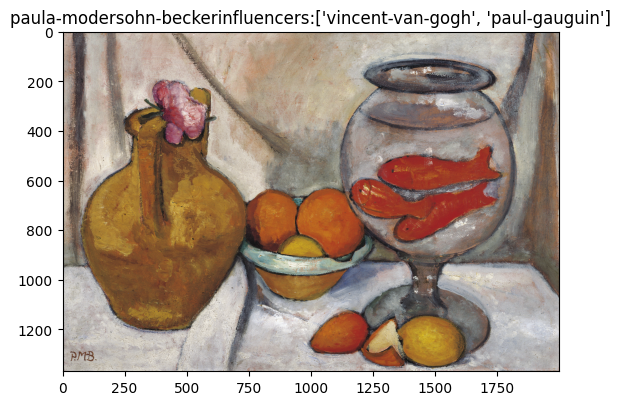

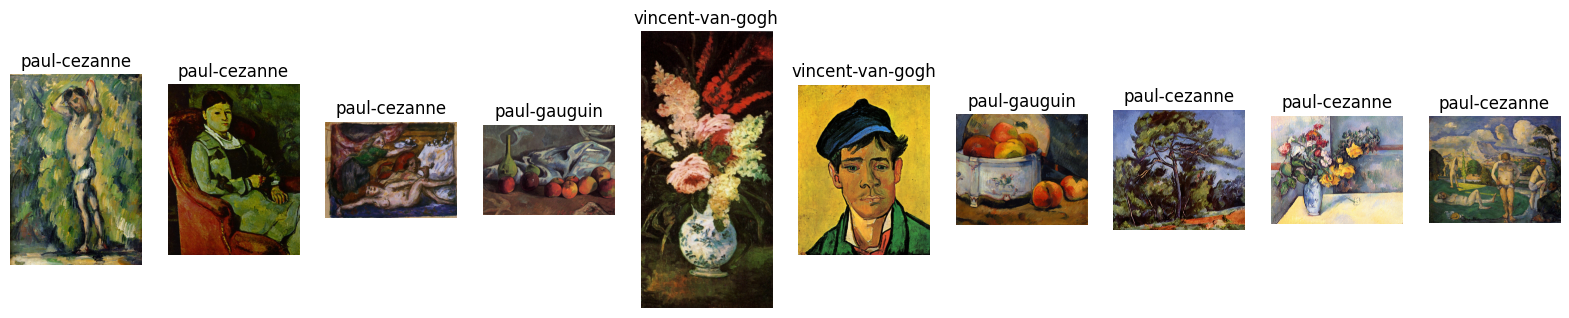

In [11]:
plot_examples(5,IR_metrics['retrieved_indexes'][5], df[df['mode'] == 'val'].reset_index(drop=True) )

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples_pos_neg(query,positive_indexes, negative_indexes, df,general_image_path ):
    plt.imshow(Image.open(general_image_path+df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name+ ' influencers:'+str(df.loc[query].influenced_by)))
    fig, axes = plt.subplots(2, 10, figsize=(20, 10))
    for i, (ax_pos, ax_neg) in enumerate(zip(axes[0], axes[1])):
        if i < len(positive_indexes):
            image_path_pos = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image_pos = Image.open(image_path_pos)
            ax_pos.imshow(image_pos)
            ax_pos.axis('off')
            ax_pos.set_title(df.iloc[positive_indexes[i]].artist_name)
        
        if i < len(negative_indexes):
            image_path_neg = general_image_path + df.iloc[negative_indexes[i]].relative_path
            image_neg = Image.open(image_path_neg)
            ax_neg.imshow(image_neg)
            ax_neg.axis('off')
            ax_neg.set_title(df.iloc[negative_indexes[i]].artist_name)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_examples_pos_neg(query, positive_indexes, negative_indexes, df, general_image_path):
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name + ' influencers: ' + str(df.loc[query].influenced_by)))
    fig, (ax_pos, ax_neg) = plt.subplots(1, 2, figsize=(15, 7))
    
    for i, idx in enumerate(positive_indexes):
        if i < len(positive_indexes):
            image_path_pos = general_image_path + df.iloc[idx].relative_path
            image_pos = Image.open(image_path_pos)
            ax_pos.imshow(image_pos)
            ax_pos.axis('off')
            ax_pos.set_title(df.iloc[idx].artist_name)

    for i, idx in enumerate(negative_indexes):
        if i < len(negative_indexes):
            image_path_neg = general_image_path + df.iloc[idx].relative_path
            image_neg = Image.open(image_path_neg)
            ax_neg.imshow(image_neg)
            ax_neg.axis('off')
            ax_neg.set_title(df.iloc[idx].artist_name)

    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_examples(query, positive_indexes, negative_indexes, df, general_image_path):
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.title(str(df.loc[query].artist_name + ' influencers: ' + str(df.loc[query].influenced_by)))
    
    fig, axes = plt.subplots(max(len(positive_indexes), len(negative_indexes)), 2, figsize=(30, 10))
    
    for i, idx in enumerate(positive_indexes):
        image_path_pos = general_image_path + df.iloc[idx].relative_path
        image_pos = Image.open(image_path_pos)
        axes[i, 0].imshow(image_pos)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(df.iloc[idx].artist_name)

    for i, idx in enumerate(negative_indexes):
        image_path_neg = general_image_path + df.iloc[idx].relative_path
        image_neg = Image.open(image_path_neg)
        axes[i, 1].imshow(image_neg)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(df.iloc[idx].artist_name)
    plt.subplots_adjust(wspace=0.001)
    plt.show()


In [ ]:
import torch
from create_data_loader import TripletLossDataset_features
import glob
data_paths = glob.glob('DATA/Dataset_toload/*', recursive = True)
data_paths = ['DATA/Dataset_toload/val_dataset_image_features_posrandom_negrandom_10.pt']
for path in data_paths:
    print(path)
    dataset_train = torch.load(path)
    positive_ex = dataset_train.positive_examples[5]
    negatives_ex = dataset_train.negative_examples[5]
    plot_examples_pos_neg(5, positive_ex,negatives_ex, df[df['mode'] == 'val'].reset_index(drop=True),general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/')
    



In [ ]:
from Triplet_Network import TripletResNet_features
feature = 'image_text_features'
model_path = 'trained_models/TripletResNet_image_text_features_posrandom_negrandom/model.pth'
model = TripletResNet_features(df.loc[0,feature].shape[0])
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()
df[f'trained_{feature}'] = df[feature].apply(lambda x: model.forward_once(x).detach())

In [ ]:
df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_try.pkl')
influence_dict =  df.groupby('artist_name')['influenced_by'].first().to_dict()

In [ ]:
#https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial17/SimCLR.html
import pandas as pd
import numpy as np
import torch
import json
def filter_dict_by_keys(input_dict, key_list):
    filtered_dict = {key: value for key, value in input_dict.items() if key in key_list}
    return filtered_dict

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        graph_dict = json.load(file)
    return graph_dict

import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph_dict):
    G = nx.from_dict_of_lists(graph_dict)
    nx.draw(G, with_labels=True, node_size=20, node_color='skyblue', font_size=5, edge_color='orange', width=0.5)
    plt.title("Graph Visualization")
    plt.show()

def draw_directed_graph(graph_dict):
    G = nx.DiGraph()
    for node, edges in graph_dict.items():
        for edge in edges:
            G.add_edge(node, edge)
    pos = nx.planar_layout(G)
    nx.draw(G,pos, with_labels=True, node_size=20, node_color='skyblue', font_size=8, arrowsize=10, edge_color='orange', width=0.5)
    plt.title("Directed Graph Visualization")
    plt.show()
    plt.savefig('plot_influence.png')

df = pd.read_pickle('DATA/Dataset/wikiart_full_combined_try.pkl')
influence_dict =  df.groupby('artist_name')['influenced_by'].first().to_dict()
artist_freq = df.artist_name.value_counts()
artist_freq = artist_freq#[artist_freq > 1000]
artist_freq_more = list(artist_freq.keys())
painters_influence_dict = filter_dict_by_keys(input_dict=influence_dict, key_list=artist_freq_more)
visualize_graph(painters_influence_dict)


In [ ]:
artist_freq = df.artist_name.value_counts()
artist_freq = artist_freq#[artist_freq > 1000]
artist_freq_more = list(artist_freq.keys())
painters_influence_dict = filter_dict_by_keys(input_dict=influence_dict, key_list=artist_freq_more)
visualize_graph(painters_influence_dict)
#draw_directed_graph(painters_influence_dict)